In [1]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram

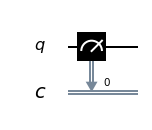

In [19]:
measure_z = QuantumCircuit(1,1)
measure_z.measure(0,0)
measure_z.draw(output='mpl')

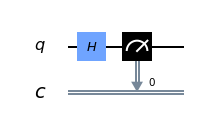

In [46]:
measure_x = QuantumCircuit(1,1)
measure_x.h(0)
measure_x.measure(0,0)
measure_x.draw(output='mpl')

Results for z measurement:


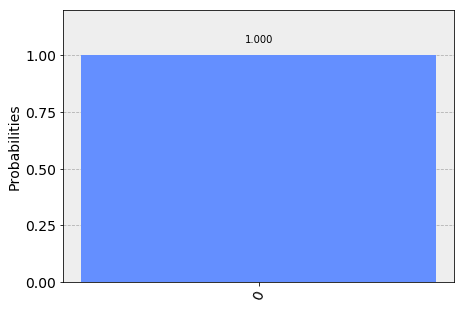

In [47]:
print('Results for z measurement:')
counts = execute(measure_z, Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

Results for x measurement:


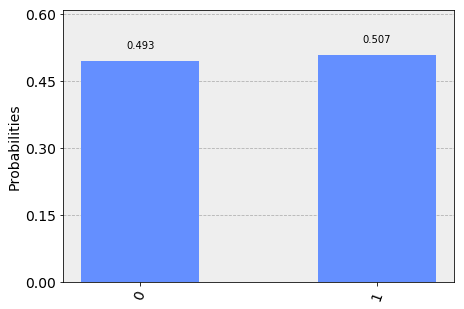

In [48]:
print('Results for x measurement:')
counts = execute(measure_x,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)